<h1>Analyse du trafic des vélos  à Montréal en 2025 à partir des données de comptage</h1>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
!pip install folium

<h2>Telechargement du fichier de données (Vélos - comptage sur les pistes cyclables, 2025) Montréal</h2>

In [2]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Téléchargement terminé : {filename}")
    else:
        print(f"Erreur {response.status_code} lors du téléchargement.")


<h2>Source : site des données ouvertes de la Ville de Montréal </h2>

In [3]:
filepath="https://donnees.montreal.ca/dataset/f170fecc-18db-44bc-b4fe-5b0b6d2c7297/resource/607715d2-4bb9-4f8e-bd05-13365e241dc6/download/comptage_velo_2025.csv"

In [4]:
download(filepath, "comptage_velo_25")
# file_name="comptage_velo_25"

Téléchargement terminé : comptage_velo_25


In [5]:
df = pd.read_csv("comptage_velo_25", header=0)

<h3>Vérifier les types de données </h3>

In [6]:
df.head(5)

,date,heure,id_compteur,nb_passages,longitude,latitude
0,2025-01-01,00:00:00,100054073,0.0,-73.590636,45.560713
1,2025-01-01,00:00:00,300021685,0.0,-73.613370,45.631590
2,2025-01-01,00:00:00,100003040,0.0,-73.544410,45.501270
3,2025-01-01,00:00:00,100052606,0.0,-73.538818,45.555084
4,2025-01-01,00:00:00,100003032,2.0,-73.562970,45.516216


df.dtypes

<h3>Convertion des colonnes date et heure </h3>

In [7]:
# Conversion de la date au format datetime
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

# Conversion de l'heure au format heure
df['heure'] = pd.to_datetime(df['heure'], format="%H:%M:%S").dt.time


In [8]:
df.dtypes

date           datetime64[ns]
heure                  object
id_compteur             int64
nb_passages           float64
longitude             float64
latitude              float64
dtype: object

<h2>Analyse exploratoire des passages</h2>

<h2>Total de passages par jour</h2>

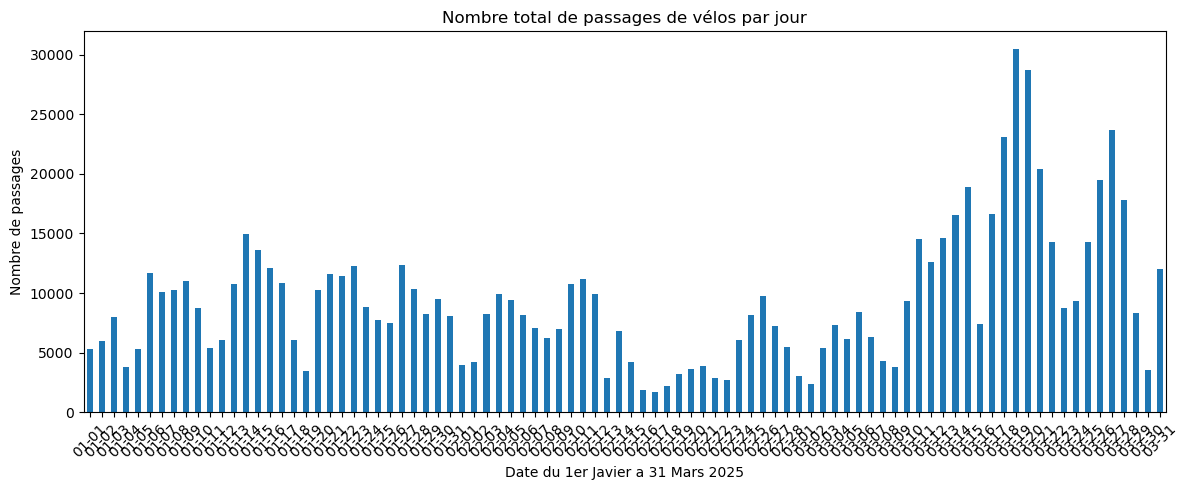

In [9]:
# Regrouper les passages par jour
passages_par_jour = df.groupby('date')['nb_passages'].sum()

# Formater les dates au format mois-jour
passages_par_jour.index = passages_par_jour.index.strftime('%m-%d')

# Tracer le graphique
passages_par_jour.plot(kind='bar', figsize=(12, 5), title='Nombre total de passages de vélos par jour')

plt.xlabel('Date du 1er Javier a 31 Mars 2025')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Total de passages de vélos par jour pour le mois de mars</h2>

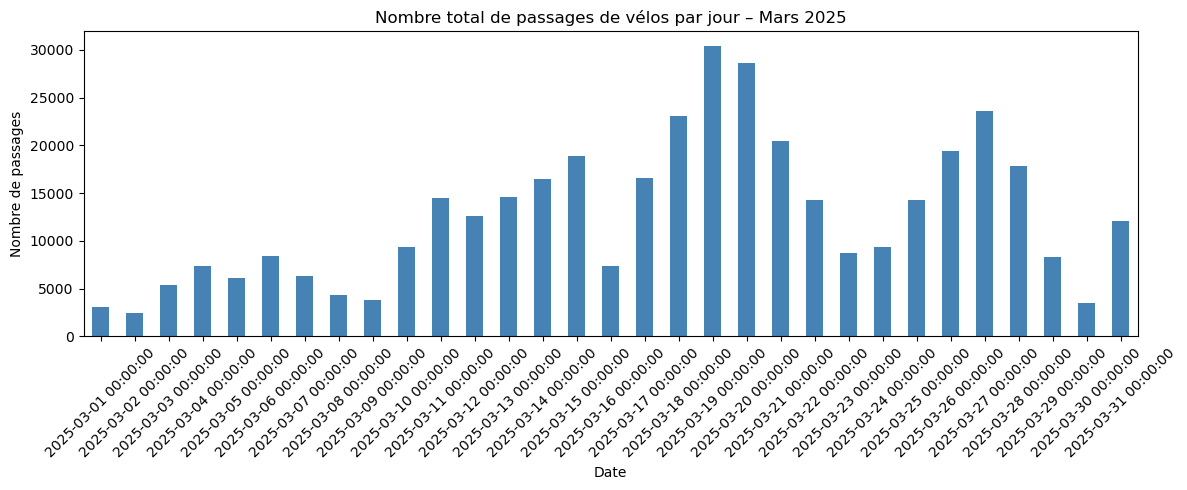

In [10]:
# Filtrer les donnees de Mars
df_mars = df[df['date'].dt.month == 3]

# Grouper date et faire la somme du nombre de passages
passages_mars_par_jour = df_mars.groupby('date')['nb_passages'].sum()

# Faire le graphique
plt.figure(figsize=(12, 5))
passages_mars_par_jour.plot(kind='bar', color='steelblue')
plt.title('Nombre total de passages de vélos par jour – Mars 2025')
plt.xlabel('Date')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Analyse mensuelle des passagers </h2>

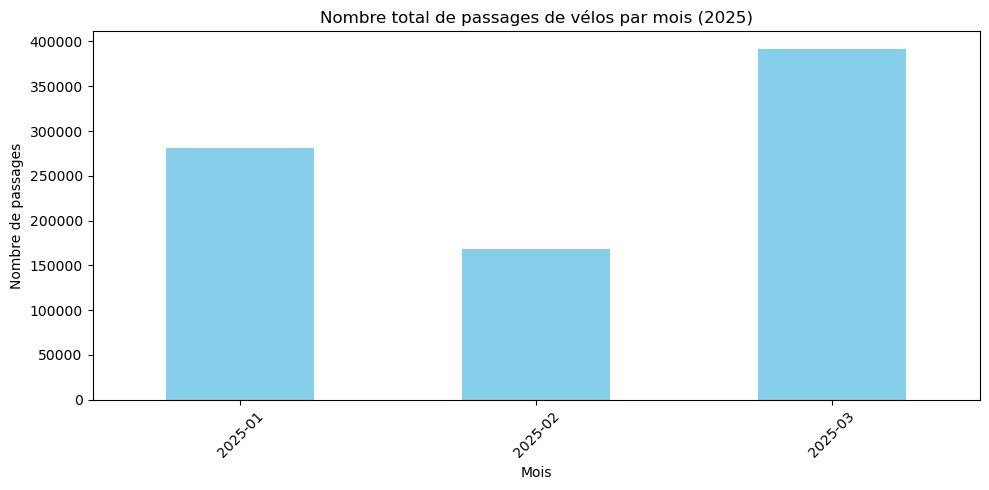

In [11]:

# Extraire le mois (format YYYY-MM) depuis la date
df['mois'] = df['date'].dt.to_period('M').astype(str)

# Grouper par mois et sommer les passages
passages_par_mois = df.groupby('mois')['nb_passages'].sum()

# Tracer le graphique
plt.figure(figsize=(10, 5))
passages_par_mois.plot(kind='bar', color='skyblue')

plt.title('Nombre total de passages de vélos par mois (2025)')
plt.xlabel('Mois')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Total de passages par heure (toutes dates confondues)</h2>

In [12]:
from datetime import datetime

In [14]:
# Grouper les donnees par heure et faire lea sommes des passages
passages_par_heure = df.groupby('heure')['nb_passages'].sum().sort_index()

<h3>Affichage du graphique</h3>

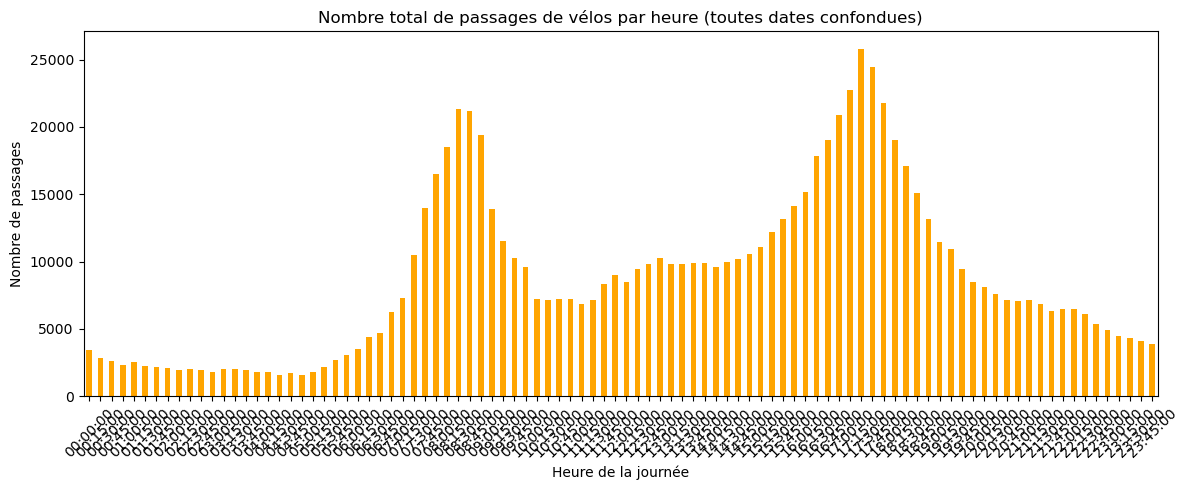

In [15]:
plt.figure(figsize=(12, 5))
passages_par_heure.plot(kind='bar', color='orange')

plt.title('Nombre total de passages de vélos par heure (toutes dates confondues)')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Analyse horaire pour quelques jours</h2>

<h3>Analyse horaire pour 3 premier jours janvier et Tracer le graphique</h3>

C:\Users\adlin\AppData\Local\Temp\ipykernel_19664\4251844481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['heure'] = df_filtre['heure'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time() if isinstance(x, str) else x)


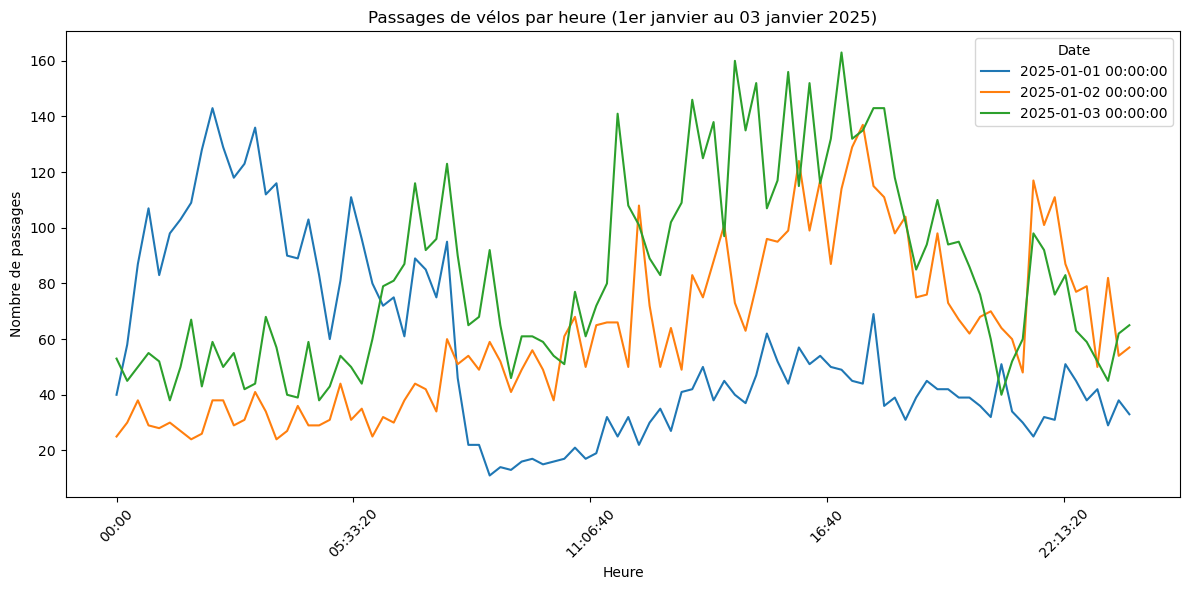

In [16]:
# Filtrage sur les 2 dernier jours de mars 2025
jours_cible = (df['date'] >= '2025-01-01') & (df['date'] <= '2025-01-03')
df_filtre = df[jours_cible]
df_filtre['heure'] = df_filtre['heure'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time() if isinstance(x, str) else x)
passages_par_heure_jour = df_filtre.groupby(['date', 'heure'])['nb_passages'].sum().unstack(level=0)
passages_par_heure_jour.plot(figsize=(12, 6), title='Passages de vélos par heure (1er janvier au 03 janvier 2025)')
plt.xlabel('Heure')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.legend(title='Date')
plt.tight_layout()
plt.show()

<h3>Analyse horaire pour 2 dernier jours de mars 2025</h3>

In [17]:
# Filtrage sur les 2 dernier jours de mars 2025
jours_cible_2 = (df['date'] >= '2025-03-30') & (df['date'] <= '2025-03-31')
df_filtre_2 = df[jours_cible_2]


In [18]:
df_filtre_2['heure'] = df_filtre_2['heure'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time() if isinstance(x, str) else x)

C:\Users\adlin\AppData\Local\Temp\ipykernel_19664\3856190085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre_2['heure'] = df_filtre_2['heure'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time() if isinstance(x, str) else x)


<h3>Regrouper par date et heure</h3>

In [19]:
passages_par_heure_jour = df_filtre_2.groupby(['date', 'heure'])['nb_passages'].sum().unstack(level=0)

<h3>Tracer le graphique</h3>

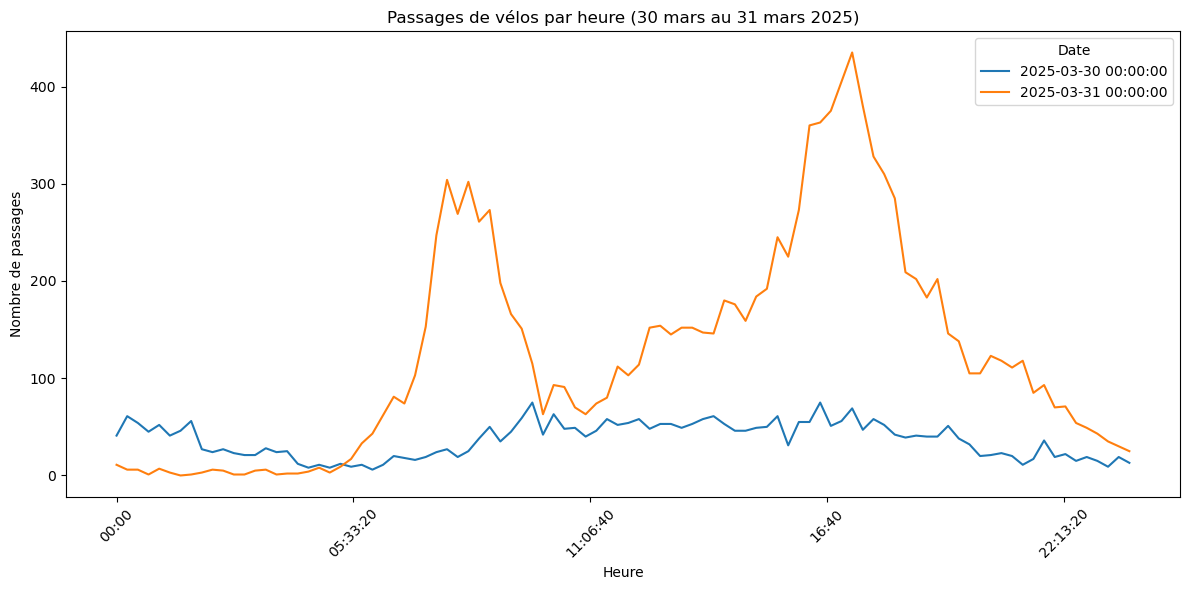

In [20]:
passages_par_heure_jour.plot(figsize=(12, 6), title='Passages de vélos par heure (30 mars au 31 mars 2025)')
plt.xlabel('Heure')
plt.ylabel('Nombre de passages')
plt.xticks(rotation=45)
plt.legend(title='Date')
plt.tight_layout()
plt.show()

In [21]:
df.tail(5)

,date,heure,id_compteur,nb_passages,longitude,latitude,mois
336848,2025-03-31,23:45:00,100053210,2.0,-73.520435,45.595537,2025-03
336849,2025-03-31,23:45:00,100017441,1.0,-73.575870,45.506134,2025-03
336850,2025-03-31,23:45:00,100053059,0.0,-73.542387,45.546844,2025-03
336851,2025-03-31,23:45:00,100047030,0.0,-73.559602,45.506008,2025-03
336852,2025-03-31,23:45:00,300028650,0.0,-73.618386,45.547048,2025-03


<h3>Tracer le graphique en barre</h3>

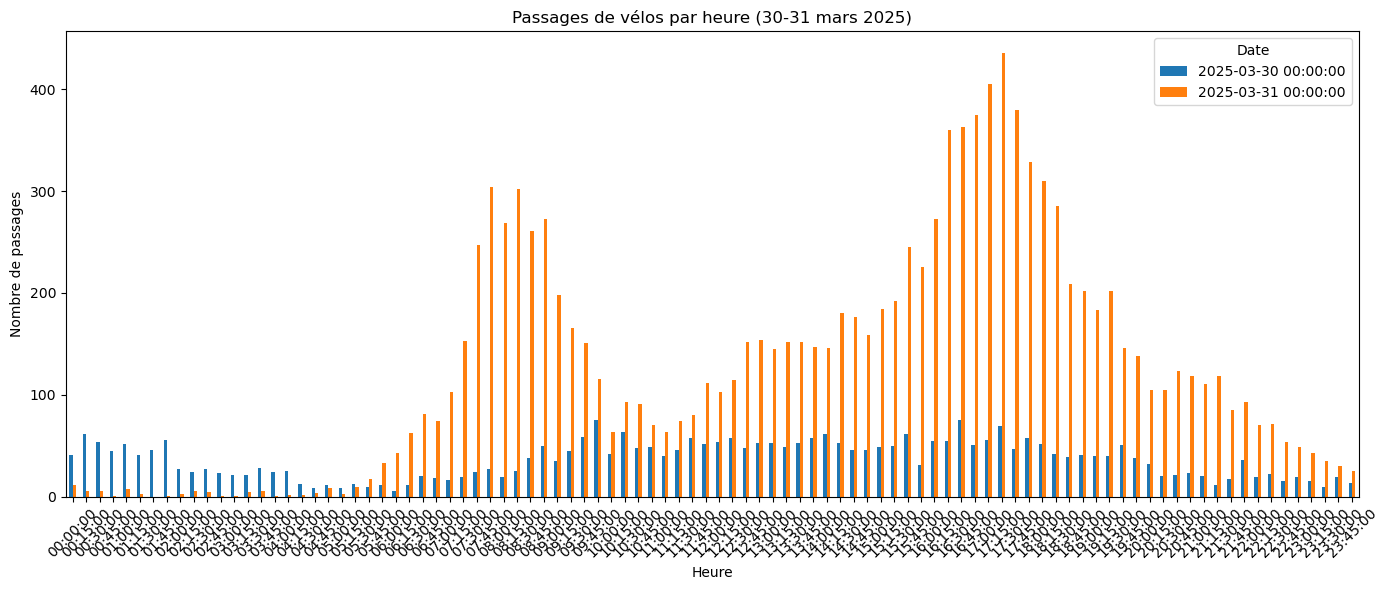

In [22]:
# Regrouper les données
passages_par_heure_jour = df_filtre_2.groupby(['heure', 'date'])['nb_passages'].sum().unstack()

# Tracer un barplot groupé
passages_par_heure_jour.plot(kind='bar', figsize=(14, 6))

plt.title("Passages de vélos par heure (30-31 mars 2025)")
plt.xlabel("Heure")
plt.ylabel("Nombre de passages")
plt.xticks(rotation=45)
plt.legend(title="Date")
plt.tight_layout()
plt.show()


<h2>Analyse par jour de la semaine</h2>

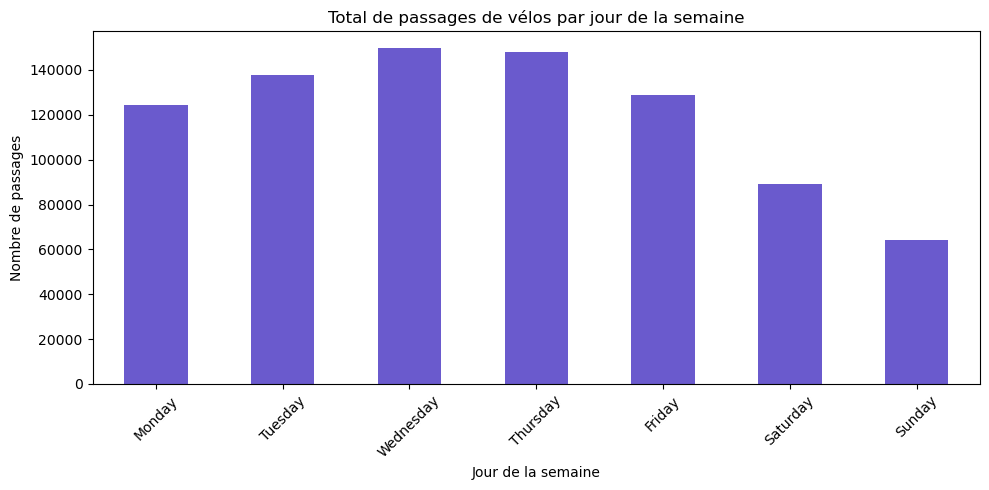

In [23]:
df['jour_semaine'] = df['date'].dt.day_name()
passages_par_jour = df.groupby('jour_semaine')['nb_passages'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

passages_par_jour.plot(kind='bar', figsize=(10, 5), color='slateblue',
                        title='Total de passages de vélos par jour de la semaine')
plt.ylabel("Nombre de passages")
plt.xlabel("Jour de la semaine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Analyse croisée jour x heure</h2>

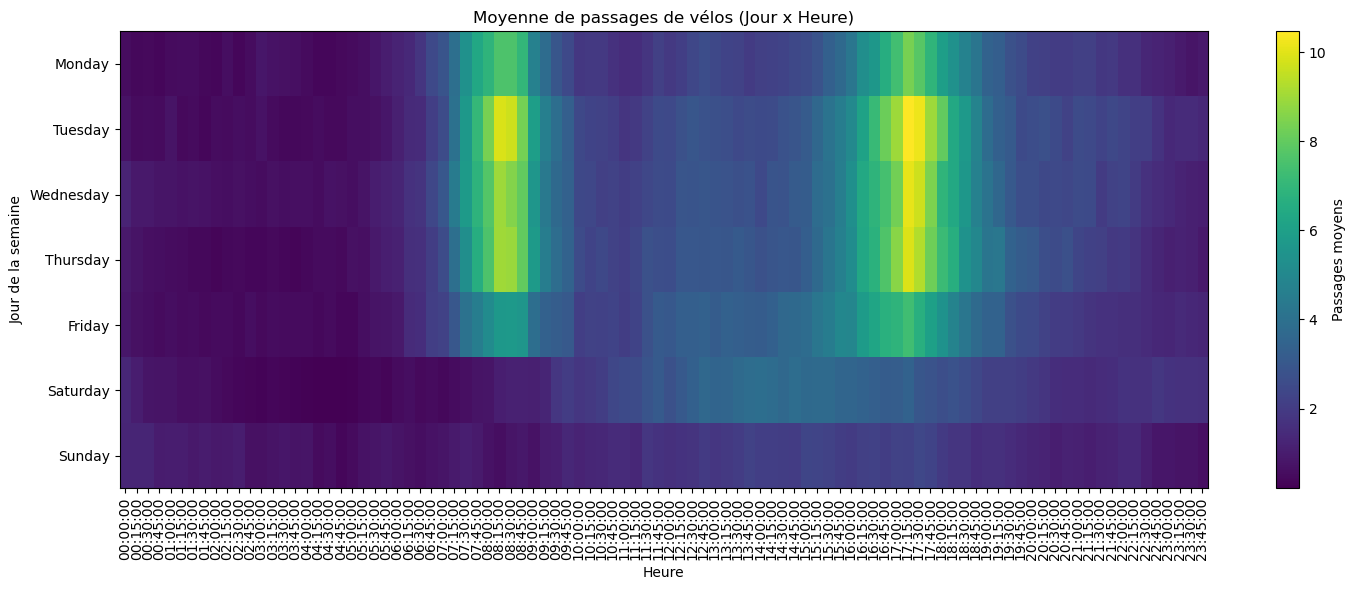

In [24]:
# Créer les colonnes nécessaires
df['jour_semaine'] = df['date'].dt.day_name()
df['heure_str'] = df['heure'].astype(str)

# Table de données pivotées
pivot = df.pivot_table(index='jour_semaine', columns='heure_str', values='nb_passages', aggfunc='mean')

# Réordonner les jours
jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(jours)

# Créer la heatmap avec matplotlib
plt.figure(figsize=(15, 6))
plt.imshow(pivot.values, aspect='auto', cmap='viridis')
plt.title("Moyenne de passages de vélos (Jour x Heure)")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.colorbar(label="Passages moyens")
plt.tight_layout()
plt.show()

<h2>Visualiser la distribution géographique</h2>

<h3>Regrouper par latitude et longitude (par compteur unique)</h3?

In [25]:
df.columns

Index(['date', 'heure', 'id_compteur', 'nb_passages', 'longitude', 'latitude',
       'mois', 'jour_semaine', 'heure_str'],
      dtype='object')

In [26]:
geo_data = df.groupby(['id_compteur', 'latitude', 'longitude'])['nb_passages'].sum().reset_index()
geo_data = geo_data.sort_values(by='nb_passages', ascending=False)

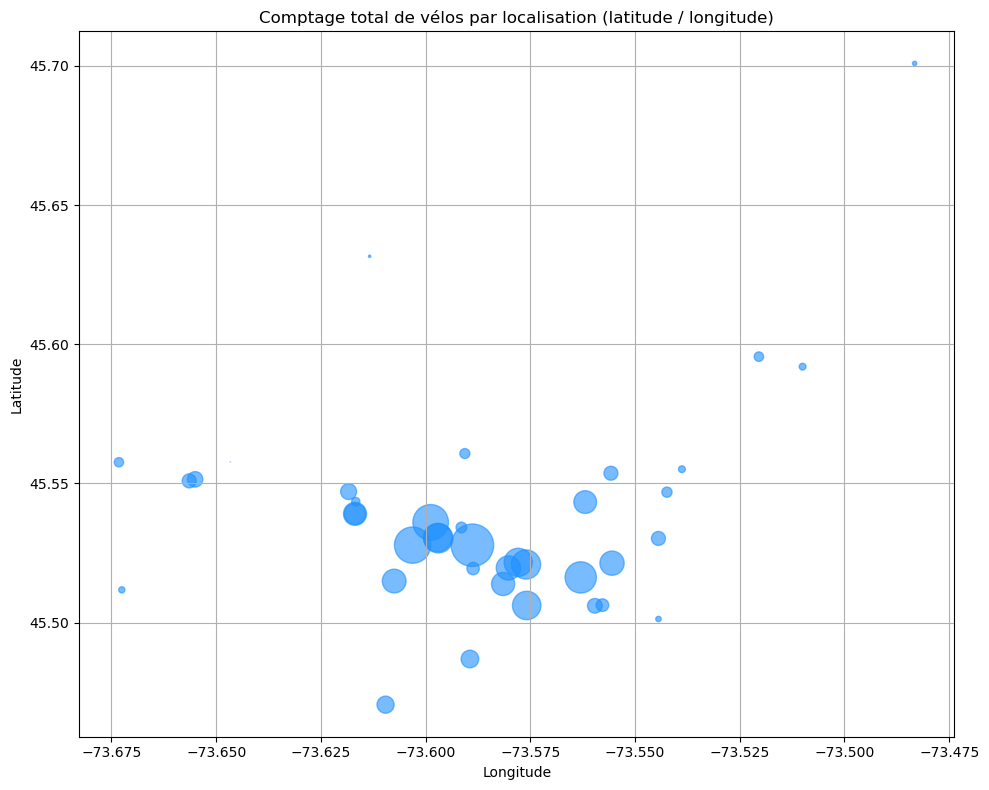

In [27]:
# Visualiser avec un scatter plot géographique
plt.figure(figsize=(10, 8))
plt.scatter(geo_data['longitude'], geo_data['latitude'],
            s=geo_data['nb_passages'] / 100,  # Ajuste selon l’échelle des volumes
            alpha=0.6, color='dodgerblue')

plt.title("Comptage total de vélos par localisation (latitude / longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Carte interactive des compteurs de vélos à Montréal – Comptage total en 2025</h2>

In [28]:
import folium

# Calculer les passages totaux par compteur
geo_data = df.groupby(['id_compteur', 'latitude', 'longitude'])['nb_passages'].sum().reset_index()

# Créer la carte positionnee sur Montréal
carte = folium.Map(location=[45.55, -73.6], zoom_start=12)

# Ajouter les marqueurs
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['nb_passages'] / 5000,  # Ajuster selon les volumes
        popup=f"ID: {row['id_compteur']}\nPassages: {int(row['nb_passages'])}",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(carte)

carte

<h3> Regarder le nombre de compteurs actifs par jour </h3>

<Axes: xlabel='date'>

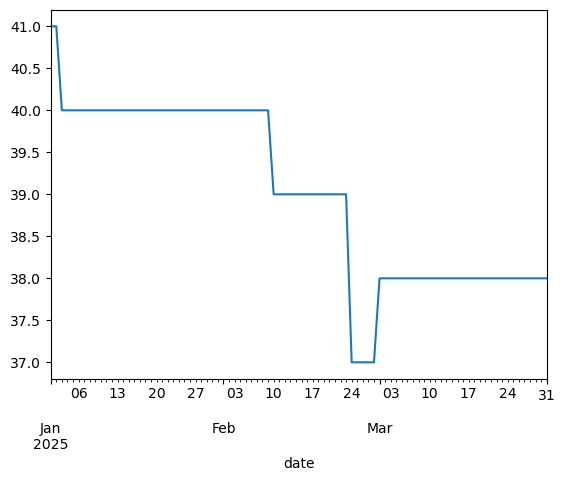

In [29]:
df.groupby('date')['id_compteur'].nunique().plot()

<h3>Voir les top jours </h3>

In [30]:
df.groupby('date')['nb_passages'].sum().sort_values(ascending=False).head(10)


date
2025-03-19    30423.0
2025-03-20    28672.0
2025-03-27    23645.0
2025-03-18    23044.0
2025-03-21    20433.0
2025-03-26    19466.0
2025-03-15    18870.0
2025-03-28    17808.0
2025-03-17    16613.0
2025-03-14    16526.0
Name: nb_passages, dtype: float64

<h3>Vérifier le nombre de compteurs actifs le jour avec le plus grand nombre de passages</h3>

In [31]:
df[df['date'] == '2025-03-19']['id_compteur'].nunique()

38

<h3>Calculer la moyenne par compteur</h3>

In [32]:
total = df[df['date'] == '2025-03-19'].groupby('id_compteur')['nb_passages'].sum()
moyenne = total.mean()
maximum = total.max()

print(f"Moyenne par compteur : {moyenne:.1f}")
print(f"Maximum par compteur : {maximum:.1f}")


Moyenne par compteur : 800.6
Maximum par compteur : 2214.0
